In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_word = pd.read_csv("out/df_noise_word.csv")
df_char = pd.read_csv("out/df_noise_char.csv")

In [10]:
full_df = pd.merge(df_word, df_char, on=['Noise Type', 'Noise Rate'], suffixes=('WORD', 'CHARACTER'))
print(full_df)

               Noise Type  Noise Rate  F1 ScoreWORD  F1 ScoreCHARACTER
0     capitalization_swap        0.10      0.601352           0.630068
1     capitalization_swap        0.15      0.573163           0.596612
2     capitalization_swap        0.20      0.539213           0.561305
3     capitalization_swap        0.25      0.509173           0.538861
4     capitalization_swap        0.30      0.487925           0.505599
5          character_swap        0.10      0.621818           0.657645
6          character_swap        0.15      0.464370           0.483133
7          character_swap        0.20      0.350374           0.321282
8          character_swap        0.25      0.306400           0.269444
9          character_swap        0.30      0.297426           0.258901
10      character_removal        0.10      0.616336           0.651635
11      character_removal        0.15      0.441565           0.455532
12      character_removal        0.20      0.312645           0.276725
13    

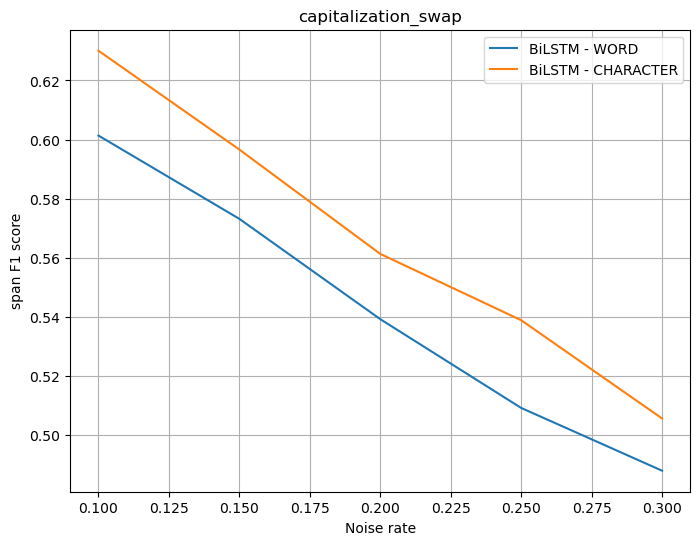

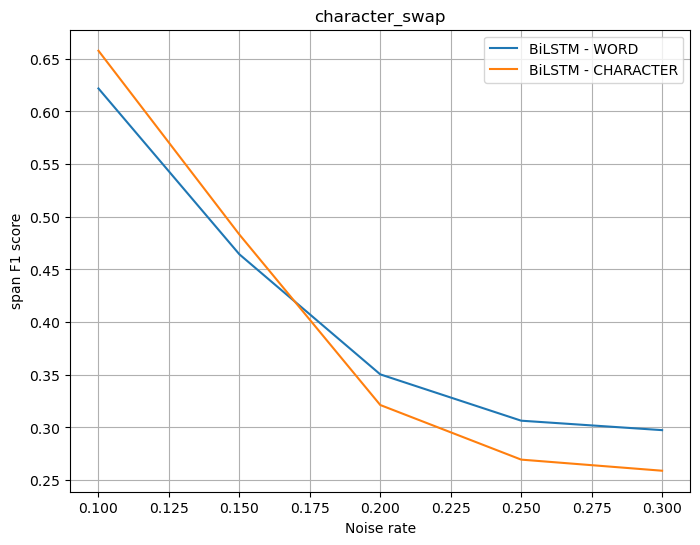

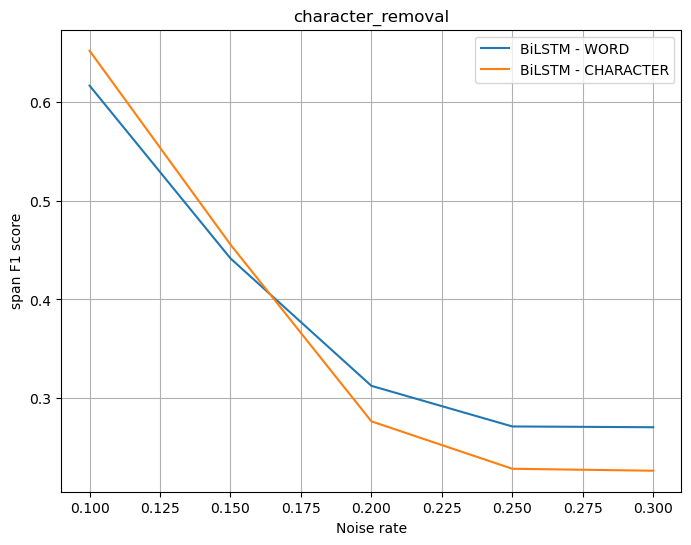

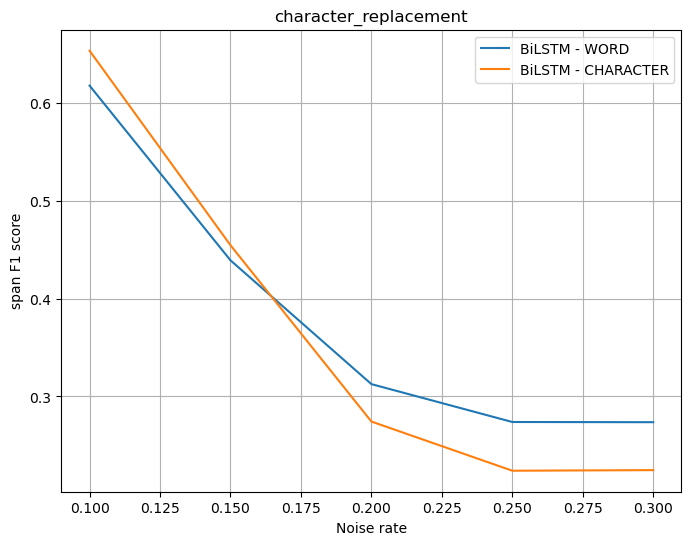

In [11]:
noise_types = df_word['Noise Type'].unique()

for noise_type in noise_types:
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Noise Type'] == noise_type]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    plt.plot(df_model2_filtered['Noise Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    plt.title(f'{noise_type}')
    plt.xlabel('Noise rate')
    plt.ylabel('span F1 score')
    plt.legend()
    plt.grid(True)
    plt.show()

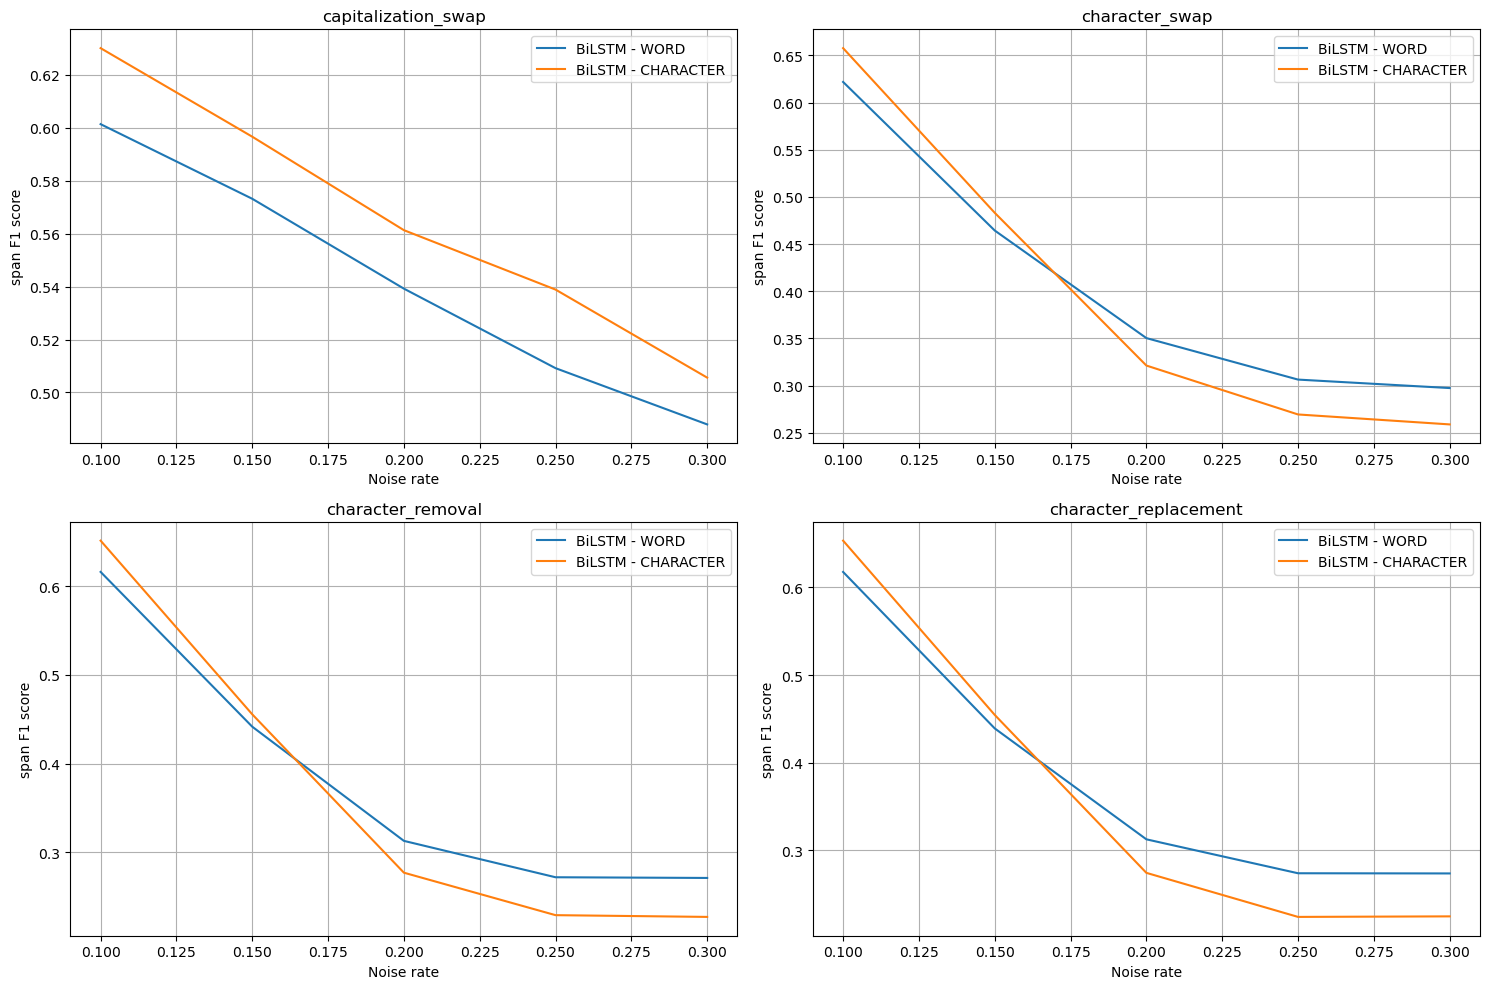

In [13]:
# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Noise Type'] == noise_type]
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Noise Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

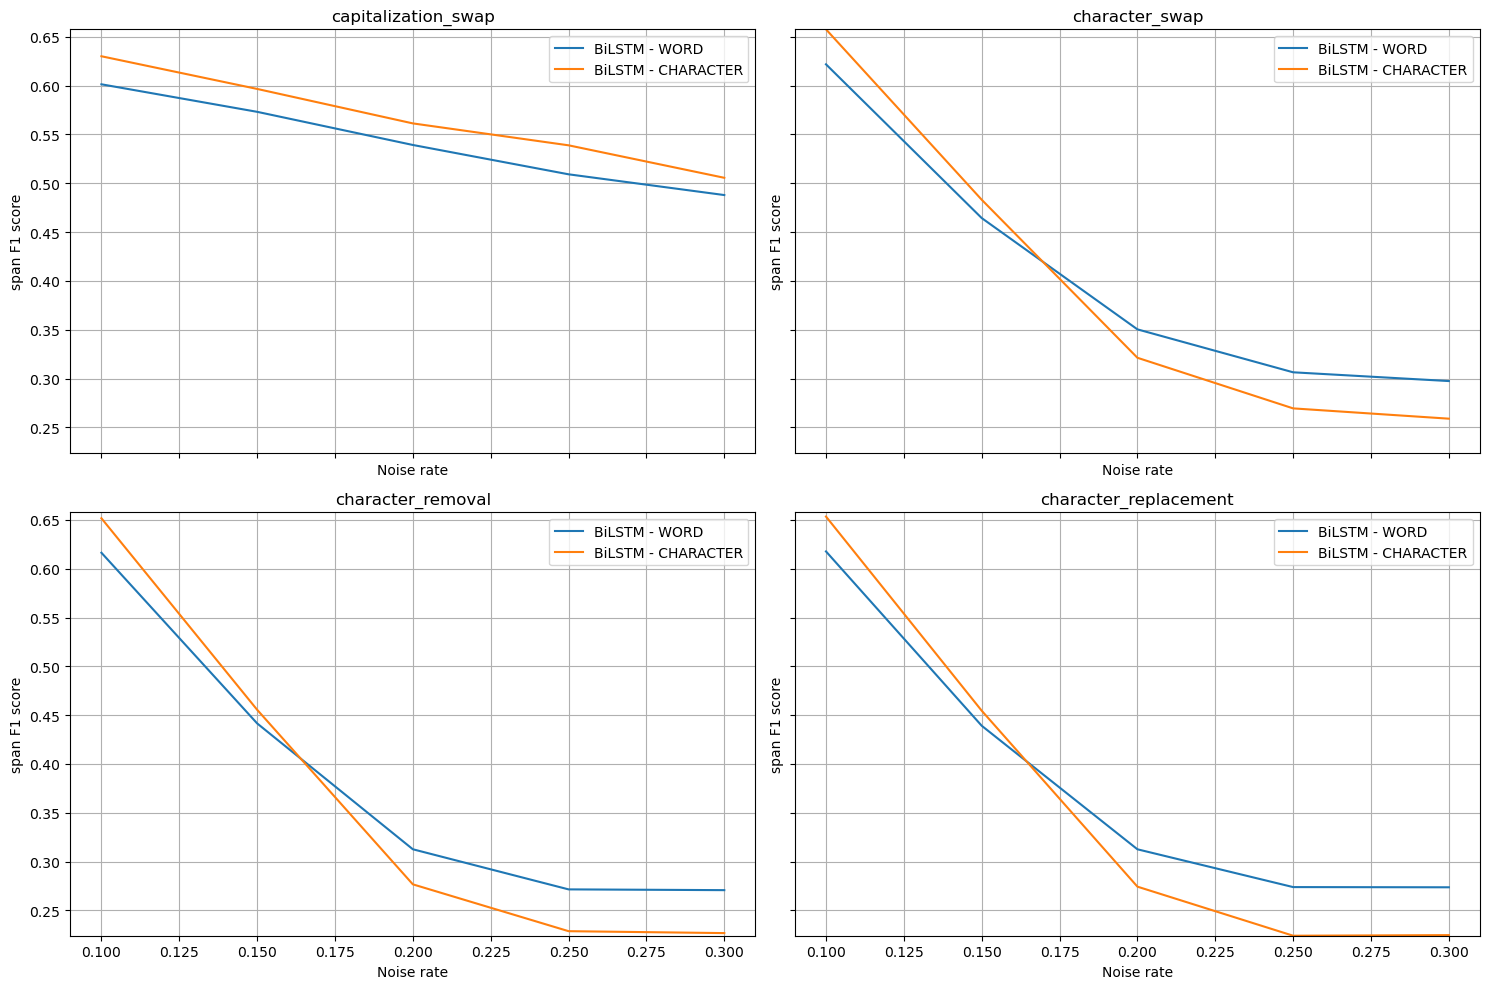

In [14]:
# Get unique noise types
noise_types = df_word['Noise Type'].unique()

# Get the range for the y-axis
y_min = min(df_word['F1 Score'].min(), df_char['F1 Score'].min())
y_max = max(df_word['F1 Score'].max(), df_char['F1 Score'].max())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, noise_type in enumerate(noise_types):
    # Filter data for the current noise type
    df_model1_filtered = df_word[df_word['Noise Type'] == noise_type]
    df_model2_filtered = df_char[df_char['Noise Type'] == noise_type]
    
    # Plotting
    axs[i].plot(df_model1_filtered['Noise Rate'], df_model1_filtered['F1 Score'], label='BiLSTM - WORD')
    axs[i].plot(df_model2_filtered['Noise Rate'], df_model2_filtered['F1 Score'], label='BiLSTM - CHARACTER')
    axs[i].set_title(noise_type)
    axs[i].set_xlabel('Noise rate')
    axs[i].set_ylabel('span F1 score')
    axs[i].set_ylim(y_min, y_max)  # Set the same y-range for all subplots
    axs[i].legend()
    axs[i].grid(True)

# Hide the unused subplots
for j in range(len(noise_types), 4):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
